In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from seaborn import lmplot

1. Preparação dos dados: 

In [3]:
banco = pd.read_csv("data.csv")
banco

,mora,atraso,vivienda,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ
0,0,235,FAMILIAR,30,3748,93.0,5,3500.00,NaN,0.00,214,Lima,4,UNIVERSITARIA
1,0,18,FAMILIAR,32,4598,9.0,12,900.00,1824.67,1933.75,175,La Libertad,1,TECNICA
2,0,0,FAMILIAR,26,5148,8.0,2,2400.00,2797.38,188.29,187,Lima,0,UNIVERSITARIA
3,0,0,FAMILIAR,36,5179,20.0,12,2700.00,NaN,0.00,187,Ancash,0,TECNICA
4,0,0,FAMILIAR,46,3960,NaN,1,3100.00,2000.00,11010.65,189,Lima,0,TECNICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,0,0,PROPIA,43,7917,106.0,12,13660.00,121543.40,8338.46,224,Lima,1,UNIVERSITARIA
8395,1,0,FAMILIAR,29,3352,25.0,0,813.00,2200.00,0.00,197,Lima,1,UNIVERSITARIA
8396,0,0,FAMILIAR,32,6821,19.0,12,3000.00,10087.00,933.68,200,Lima,1,UNIVERSITARIA
8397,1,0,PROPIA,38,3882,7.0,12,3069.23,23994.00,13954.65,221,Lambayeque,1,UNIVERSITARIA


**Completude de dados**:


In [4]:
banco.shape

(8399, 14)

In [5]:
banco.columns

Index(['mora', 'atraso', 'vivienda', 'edad', 'dias_lab', 'exp_sf',
       'nivel_ahorro', 'ingreso', 'linea_sf', 'deuda_sf', 'score', 'zona',
       'clasif_sbs', 'nivel_educ'],
      dtype='object')

In [6]:
banco.dtypes

mora              int64
atraso            int64
vivienda         object
edad              int64
dias_lab          int64
exp_sf          float64
nivel_ahorro      int64
ingreso         float64
linea_sf        float64
deuda_sf        float64
score             int64
zona             object
clasif_sbs        int64
nivel_educ       object
dtype: object

In [7]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mora          8399 non-null   int64  
 1   atraso        8399 non-null   int64  
 2   vivienda      8399 non-null   object 
 3   edad          8399 non-null   int64  
 4   dias_lab      8399 non-null   int64  
 5   exp_sf        6569 non-null   float64
 6   nivel_ahorro  8399 non-null   int64  
 7   ingreso       8399 non-null   float64
 8   linea_sf      7272 non-null   float64
 9   deuda_sf      7938 non-null   float64
 10  score         8399 non-null   int64  
 11  zona          8399 non-null   object 
 12  clasif_sbs    8399 non-null   int64  
 13  nivel_educ    8399 non-null   object 
dtypes: float64(4), int64(7), object(3)
memory usage: 918.8+ KB


2. Análise Estatística

- Estatísticas descritivas


In [8]:
banco.describe()

,mora,atraso,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,clasif_sbs
count,8399.000000,8399.00000,8399.000000,8399.000000,6569.000000,8399.000000,8399.000000,7272.000000,7938.000000,8399.000000,8399.000000
mean,0.704251,4.46315,36.399095,5555.888796,32.401583,10.593166,4350.406997,11987.241038,6110.724308,196.619955,0.563519
std,0.456406,14.27084,9.825764,2153.244140,32.866232,3.374619,5367.058953,21322.801655,11177.989799,19.544348,0.905637
min,0.000000,0.00000,20.000000,2956.000000,0.000000,0.000000,123.700000,0.000000,0.000000,134.000000,0.000000
25%,0.000000,0.00000,29.000000,4174.000000,7.000000,12.000000,1366.670000,1169.372500,478.320000,182.000000,0.000000
50%,1.000000,0.00000,34.000000,4904.000000,20.000000,12.000000,2400.000000,4030.120000,2258.755000,197.000000,0.000000
75%,1.000000,2.00000,42.000000,6182.000000,51.000000,12.000000,4900.000000,12086.627500,5755.150000,212.000000,1.000000
max,1.000000,245.00000,85.000000,20700.000000,130.000000,12.000000,30000.000000,121543.400000,57094.380000,266.000000,4.000000


- Categóricas

In [9]:
banco.describe(include = [object])

,vivienda,zona,nivel_educ
count,8399,8399,8399
unique,3,25,4
top,FAMILIAR,Lima,UNIVERSITARIA
freq,5853,4980,4802


- Medidas repetidas

In [10]:
((banco == 0).sum(axis=0)/banco.shape[0])*100

mora            29.574949
atraso          62.197881
vivienda         0.000000
edad             0.000000
dias_lab         0.000000
exp_sf          14.977974
nivel_ahorro     5.798309
ingreso          0.000000
linea_sf         8.893916
deuda_sf        14.108822
score            0.000000
zona             0.000000
clasif_sbs      62.888439
nivel_educ       0.000000
dtype: float64

Observações: 
-  O desvio padrão elevado em várias variáveis sugere uma ampla dispersão dos dados em torno das médias;
- A análise da distribuição de valores zero revela concentrações significativas em algumas colunas: "mora" (30%), "atraso" (62%) e "clasif_sbs" (63%). Inicialmente, isso pode ser interpretado de forma positiva. Por exemplo, mais de 60% dos clientes na coluna "atraso" têm zero dias de atraso, conforme mostrado no gráfico;
- A coluna "mora" exibe uma distribuição binária;
- Há uma concentração de casos em que as variáveis como tipo de moradia (Familiar), local de residência (Lima) e nível de educação (Universitária) estão associadas ao uso de linhas de crédito, sugerindo um padrão.

3. Correlações e Dependências
- Calculo da matriz de correlação;
- Vizualização da matriz;
- Analise das dependencias e categorias;


In [12]:
colunas_numericas = banco.select_dtypes(include=['number']).columns
df_numerico = banco[colunas_numericas]

In [13]:
correlacao_matriz = df_numerico.corr()
correlacao_matriz


,mora,atraso,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,clasif_sbs
mora,1.000000,0.078402,-0.105192,-0.131925,-0.257816,-0.096376,-0.163084,-0.188750,-0.017114,-0.216216,0.085210
atraso,0.078402,1.000000,-0.005248,0.021681,0.020472,-0.105320,0.015301,-0.021951,-0.015306,-0.026830,0.270044
edad,-0.105192,-0.005248,1.000000,0.479131,0.357550,-0.086907,0.302884,0.284748,0.114216,0.431785,0.023860
dias_lab,-0.131925,0.021681,0.479131,1.000000,0.352581,-0.082447,0.234105,0.194863,0.046616,0.273649,0.026954
exp_sf,-0.257816,0.020472,0.357550,0.352581,1.000000,-0.020103,0.424198,0.499482,0.212072,0.384511,0.110489
nivel_ahorro,-0.096376,-0.105320,-0.086907,-0.082447,-0.020103,1.000000,-0.093000,-0.059218,-0.058619,0.081754,-0.010421
ingreso,-0.163084,0.015301,0.302884,0.234105,0.424198,-0.093000,1.000000,0.534103,0.292199,0.380130,0.036106
linea_sf,-0.188750,-0.021951,0.284748,0.194863,0.499482,-0.059218,0.534103,1.000000,0.359033,0.319192,0.017503
deuda_sf,-0.017114,-0.015306,0.114216,0.046616,0.212072,-0.058619,0.292199,0.359033,1.000000,0.199413,0.010243
score,-0.216216,-0.026830,0.431785,0.273649,0.384511,0.081754,0.380130,0.319192,0.199413,1.000000,0.087576


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

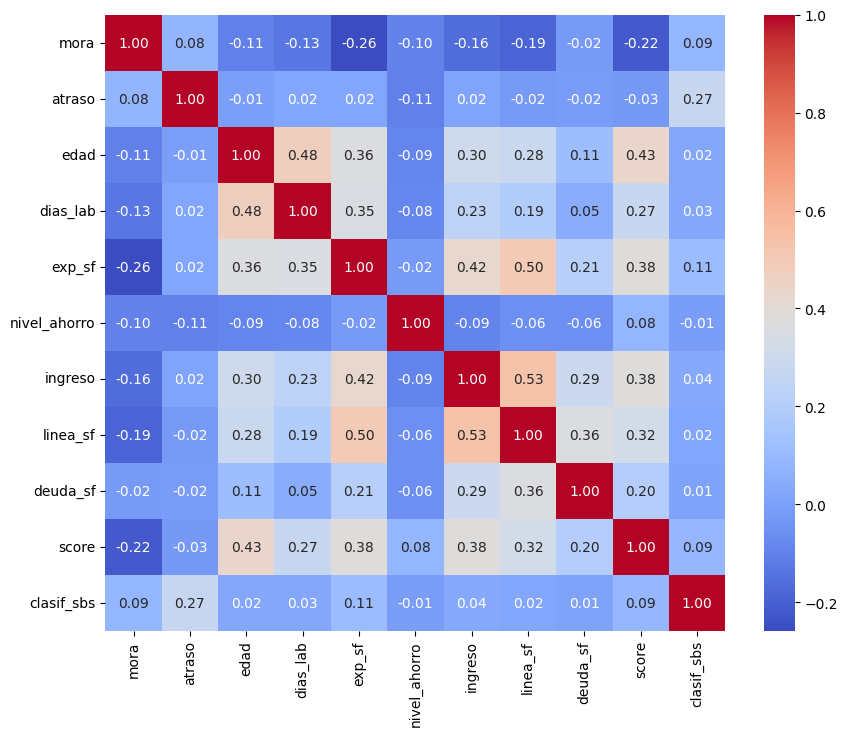

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao_matriz, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [16]:
from scipy.stats import chi2_contingency


In [17]:
contingency_table = pd.crosstab(banco['zona'], banco['nivel_educ'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
contingency_table, chi2, p


(nivel_educ     SECUNDARIA  SIN EDUCACION  TECNICA  UNIVERSITARIA
 zona                                                            
 Amazonas                0              0        1              0
 Ancash                  9              0       88            127
 Apurimac                0              0        0              8
 Arequipa                5              0      141            203
 Ayacucho                0              1        2             20
 Cajamarca               1              0       56            116
 Callao                 20              1      259            227
 Cuzco                   2              0       32             62
 Huancavelica            0              0        3              0
 Huanuco                 5              0       20             12
 Ica                    17              0      185             98
 Junin                   2              1      168             92
 La Libertad            40              4      173            230
 Lambayequ

In [18]:
banco['income_category'] = pd.cut(banco['deuda_sf'], bins=5, labels=['Muito Baixa', 'Baixa', 'Média', 'Alta', 'Muito Alta'])

contingency_table_income = pd.crosstab(banco['income_category'], banco['clasif_sbs'])

chi2_income, p_income, dof_income, expected_income = chi2_contingency(contingency_table_income)

contingency_table_income, chi2_income, p_income
contingency_table_income.head()

clasif_sbs,0,1,2,3,4
income_category,,,,,
Muito Baixa,4385,1671,540,146,159
Baixa,310,129,33,12,19
Média,114,59,5,3,17
Alta,40,38,7,2,4
Muito Alta,137,90,12,6,0


Observações:
- correlacao_matriz: relação onde clientes com mais experiência no sistema financeiro tendem a ter uma menor probabilidade de inadimplência (mora);
- correlacao_matriz: associação entre idade e dias trabalhados, o que é esperado, pois geralmente a idade está correlacionada com a experiência profissional e o número de dias trabalhados;
- contingency_table: Observa-se uma clara disparidade na distribuição do nível de educação entre as diferentes regiões;
- contingency_table_income: Há uma clara correlação entre o nível de risco de crédito (clasif_sbs) e a categoria de renda;
- contingency_table_income: As categorias de renda mais baixas (Muito Baixa, Baixa, Média) mostram uma concentração maior em clasif_sbs 0, sugerindo um perfil de crédito mais seguro. As categorias de renda mais altas (Alta, Muito Alta) têm distribuições mais variadas em termos de clasif_sbs, com uma presença mais significativa nos níveis 3 e 4.

4. Distribuição das Variáveis

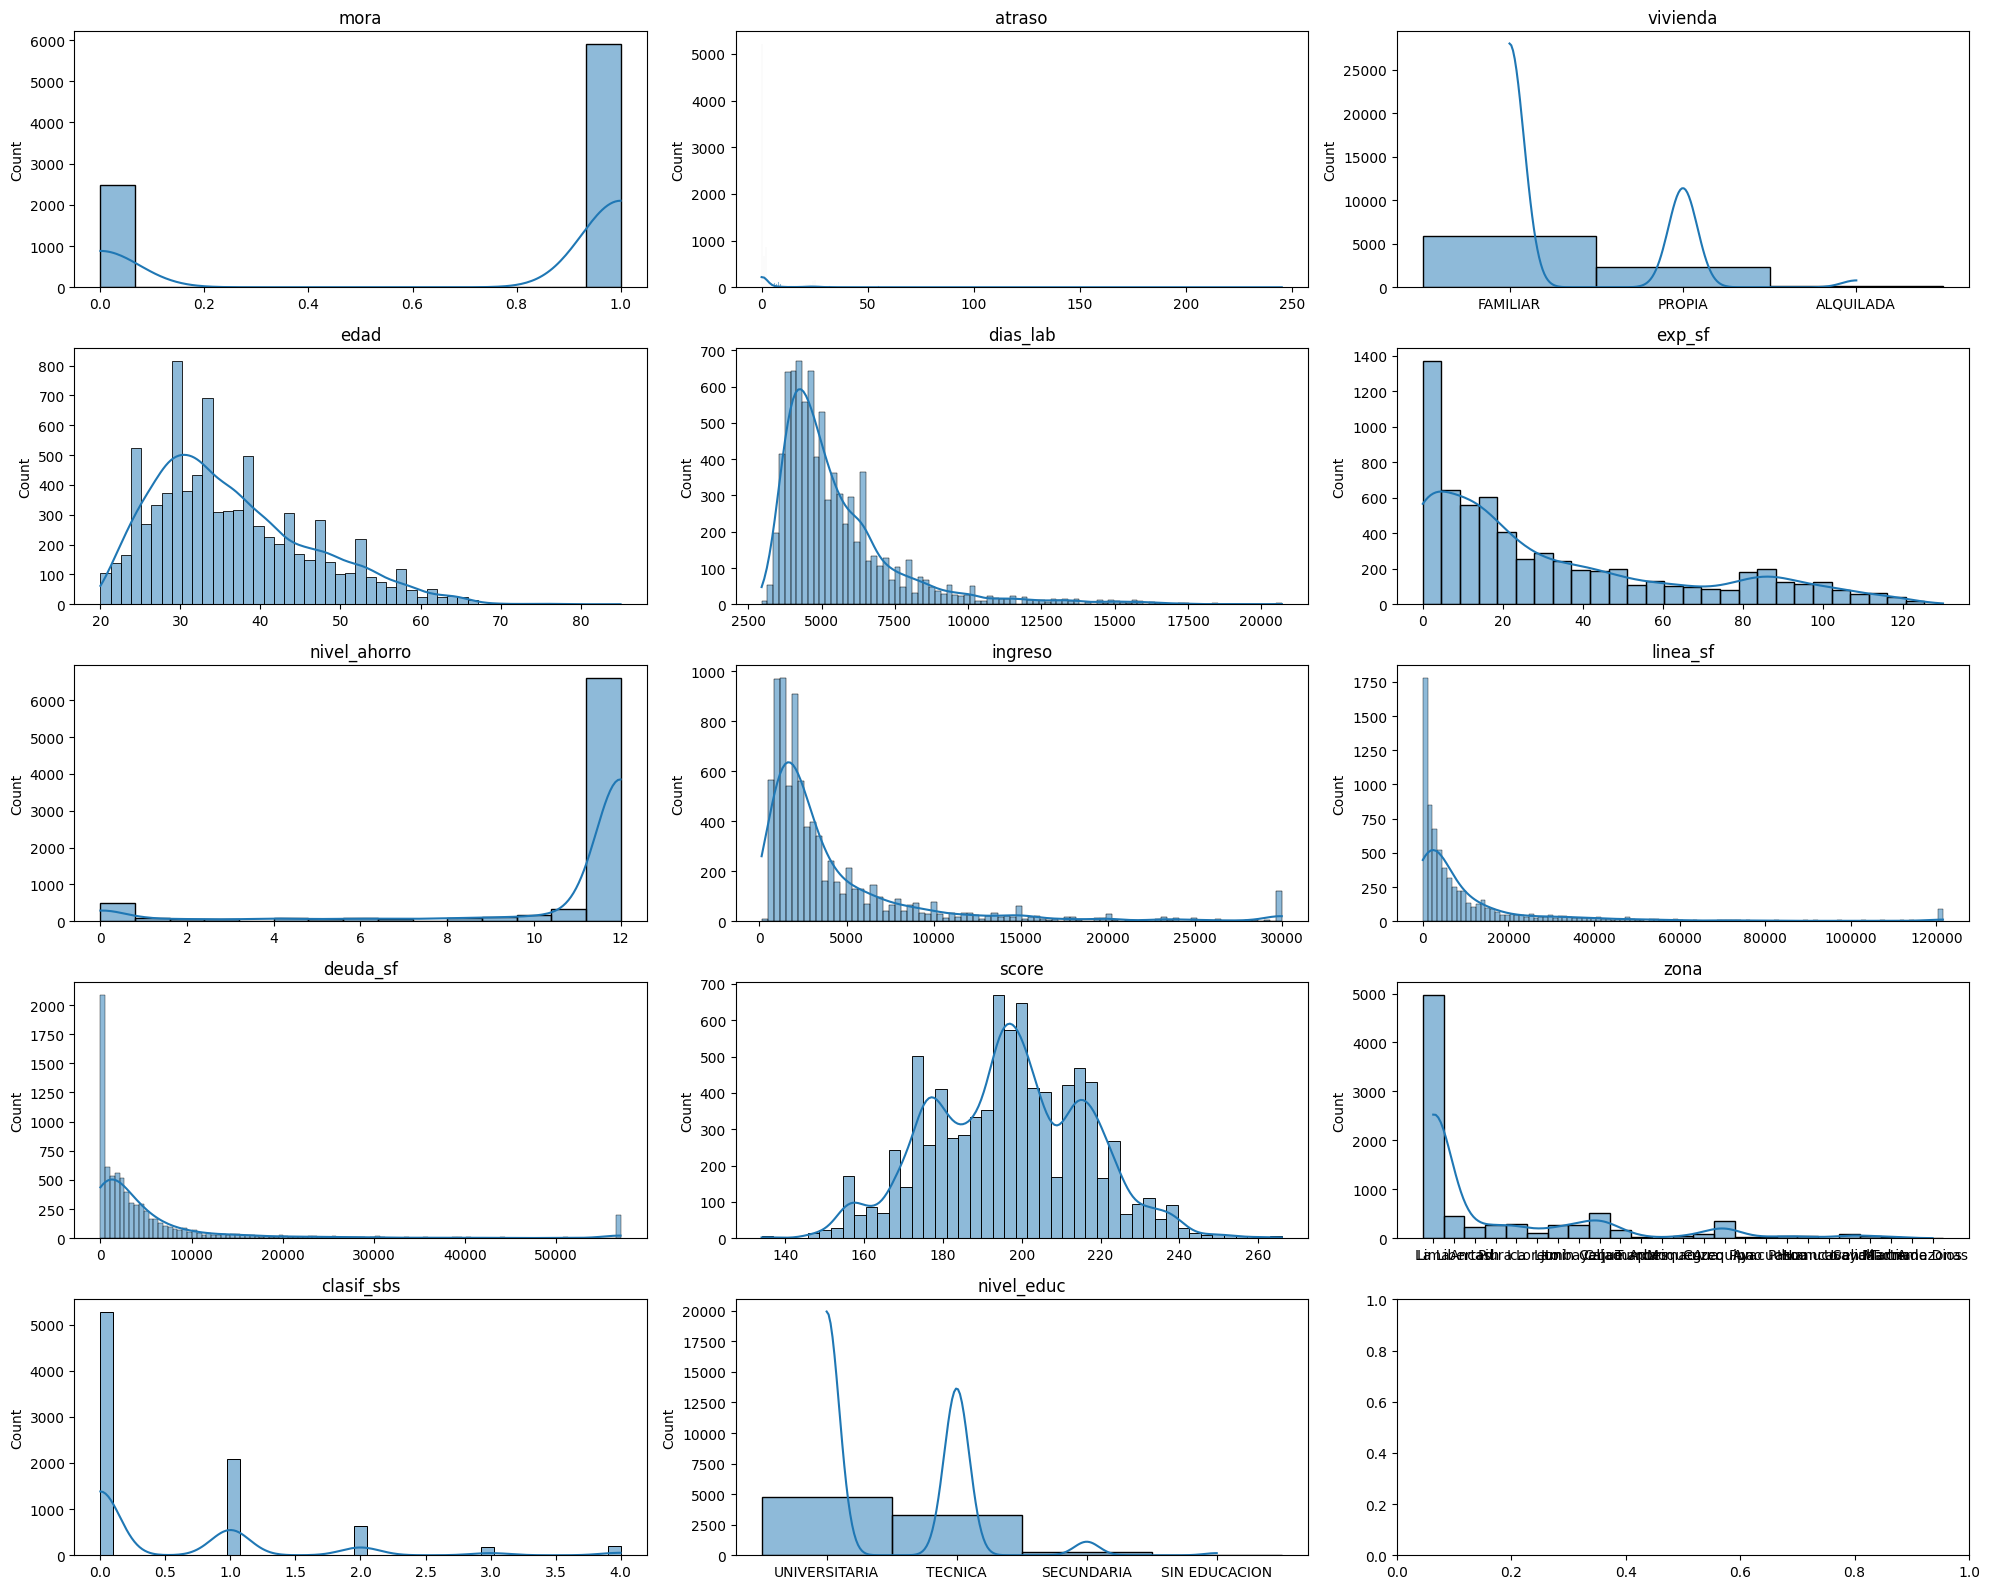

In [19]:
variables = ['mora', 'atraso', 'vivienda', 'edad', 'dias_lab', 'exp_sf',
       'nivel_ahorro', 'ingreso', 'linea_sf', 'deuda_sf', 'score', 'zona',
       'clasif_sbs', 'nivel_educ']

columns = 3
rows    = 5
fig, axes = plt.subplots(rows, columns, figsize=(20,16))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.histplot(banco[variable], ax = axes[i][j], kde = True)
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()

 Observações: 

- Assimetrias em várias colunas;
- Presença de outliers (inicialmente não impactam a analise);
